<a href="https://colab.research.google.com/github/NiloofarSeyf/Data-scieince-Projects/blob/main/Google_stock_price_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np 
import pandas as pd 
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 


In [ ]:
#uploading the dataset
dataset= pd.read_csv('/content/GOOG.csv')

In [ ]:
#splitting dataset in test and train
Google_dataset_train = dataset.iloc[:1247,:]
Google_dataset_test = dataset.iloc[1247:,:]

In [ ]:
training_set = Google_dataset_train.loc[:,['close', 'open']].values

In [ ]:
#Normalizing
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
x_train = []
y_train = []

for i in range(60, 1247):
    x_train.append(training_set_scaled[i-60:i,0:2])
    y_train.append(training_set_scaled[i,0:2])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))

In [ ]:
Regressor = Sequential()

In [ ]:
#building the model architecture

Regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (x_train.shape[1], 2)))
Regressor.add(Dropout(0.2))             

Regressor.add(LSTM(units = 128, return_sequences = True))
Regressor.add(Dropout(0.2))

Regressor.add(LSTM(units = 256))
Regressor.add(Dropout(0.2))

Regressor.add(Dense(units = 2))

In [ ]:
#fitting regressor for 120 epochs
Regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
Regressor.fit(x_train, y_train, epochs = 120, batch_size = 32)

Epoch 1/120
38/38 [==============================] - 19s 331ms/step - loss: 0.0137
Epoch 2/120
38/38 [==============================] - 12s 306ms/step - loss: 0.0020
Epoch 3/120
38/38 [==============================] - 13s 332ms/step - loss: 0.0023
Epoch 4/120
38/38 [==============================] - 12s 304ms/step - loss: 0.0017
Epoch 5/120
38/38 [==============================] - 12s 303ms/step - loss: 0.0017
Epoch 6/120
38/38 [==============================] - 12s 306ms/step - loss: 0.0019
Epoch 7/120
38/38 [==============================] - 12s 305ms/step - loss: 0.0013
Epoch 8/120
38/38 [==============================] - 12s 305ms/step - loss: 0.0013
Epoch 9/120
38/38 [==============================] - 12s 302ms/step - loss: 0.0015
Epoch 10/120
38/38 [==============================] - 12s 303ms/step - loss: 0.0014
Epoch 11/120
38/38 [==============================] - 12s 304ms/step - loss: 0.0015
Epoch 12/120
38/38 [==============================] - 12s 304ms/step - loss: 0.0018
E

In [ ]:
dataset_test = Google_dataset_test.loc[:,['close', 'open']]

dataset_total = dataset.loc[:,['close', 'open'],]
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-2, 2)
inputs = sc.transform(inputs)

x_test = []

for i in range(60, 70):
    x_test.append(inputs[i-60:i,0:2])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 2))
predicted_stock_price = Regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

real_stock_price = Google_dataset_test.loc[:,['close', 'open']].values


1/1 [==============================] - 1s 1s/step


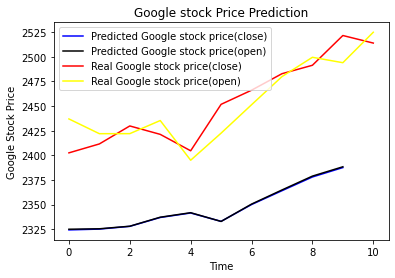

In [ ]:
#Plotting results

plt.plot(predicted_stock_price[:,0], color = 'blue', label = 'Predicted Google stock price(close)')
plt.plot(predicted_stock_price[:,1], color = 'black', label = 'Predicted Google stock price(open)')
plt.plot(real_stock_price[:, 0], color = 'red', label = 'Real Google stock price(close)')
plt.plot(real_stock_price[:, 1], color = 'yellow', label = 'Real Google stock price(open)')
plt.title('Google stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [ ]:
#as you see in the plot, the accuracy of the model for a few days is good and close to the real prices.